In [36]:
## Look at the log-product function to solve Backwards Euler
f = x -> x*exp(x) - (0.1)*(1.0+0.1)

## Find a region where f has a different sign
a = 0.0
b = 10.0
@show f(a)
@show f(b)


f(a) = -0.11000000000000001
f(b) = 220264.5479480672


220264.5479480672

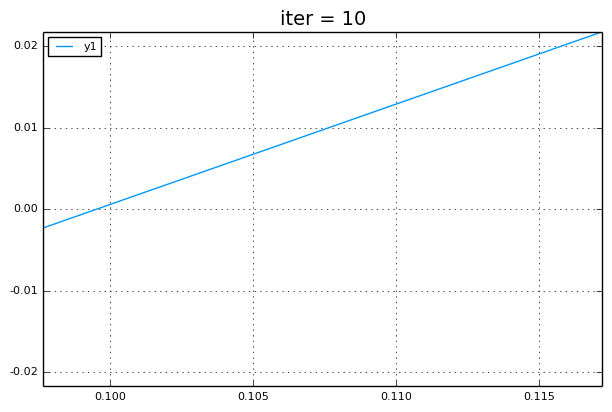

INFO: Saved animation to /home/juser/CS314-2016/bisection.gif


Plots.AnimatedGif("/home/juser/CS314-2016/bisection.gif")

In [23]:
## Illustrate bisection
using Plots
pyplot()
a = 0.0
b = 10.0
anim = @animate for i=1:10
    plot(f,[a,b])
    fa = f(a)
    fb = f(b)
    ab2 = 0.5*a + 0.5*b
    fab2 = f(ab2)
    if sign(fab2*fb) <= 0
        a = ab2
    else
        b = ab2
    end
    yl = max(abs(fa),abs(fb)) # show symmetric y
    ylims!(-yl,yl)
    title!(@sprintf("iter = %i",i))
end
gif(anim, "bisection.gif", fps = 1)

In [31]:
"""
`bisection`
===========
-`bisection(f, a, b)`
-`bisection(f, a, b, delta)`

Find a root of the scalar function f, given that f(a) and f(b) have 
different signs and f is continuous. The value x will be within
delta of a root. The method is repeated interval bisection.
"""
function bisection(f,a,b,delta)
    fa = f(a)
    fb = f(b)
    @assert(sign(fa*fb) <= 0)
    maxit = 150 # see more on why so large
    for i=1:maxit
        ab2 = 0.5*a + 0.5*b
        fab2 = f(ab2)
        if abs(fab2) <= eps(1.0)
            break
        end
        if sign(fab2*fb) <= 0
            a = ab2
            fa = fab2
        else
            b = ab2
            fb= fab2
        end
        if abs(b-a) <= delta
            break
        end
    end
    return 0.5*a + 0.5*b
end
# set default 
bisection(f,a,b) = bisection(f,a,b,eps(1.0))

bisection (generic function with 2 methods)

In [35]:
@show x = bisection(f,0.0,10.0)
@show f(x)
@show f(x+eps(1.0))

x = bisection(f,0.0,10.0) = 0.09957447809219977
f(x) = -2.7755575615628914e-17
f(x + eps(1.0)) = 2.3592239273284576e-16


2.3592239273284576e-16